In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('population_structure_by_age_per_contry.csv')
df

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
df.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [5]:
df['Fraction age 0-14 years'] = df['Fraction age 0-14 years'].fillna(0)
df['Fraction age 15-64 years'] = df['Fraction age 15-64 years'].fillna(0)
df['Fraction age 65+ years'] = df['Fraction age 65+ years'].fillna(0)

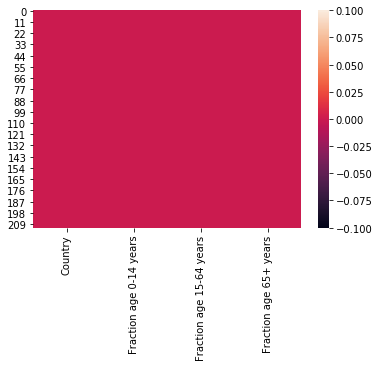

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   213 non-null    float64
 2   Fraction age 15-64 years  213 non-null    float64
 3   Fraction age 65+ years    213 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [9]:
df.shape

(213, 4)

In [11]:
df.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [12]:
df.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,213.000000,213.000000,213.000000
mean,0.228137,0.525611,0.072491
std,0.142827,0.249014,0.065854
min,0.000000,0.000000,0.000000
25%,0.147000,0.533000,0.027000
50%,0.227000,0.638000,0.047000
75%,0.335000,0.667000,0.114000
max,0.502000,0.850000,0.270000


In [18]:
le=LabelEncoder()
df['Country'].value_counts()
df['Country']=le.fit_transform(df['Country'])

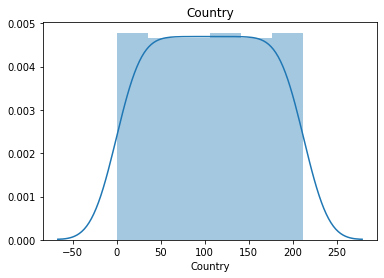

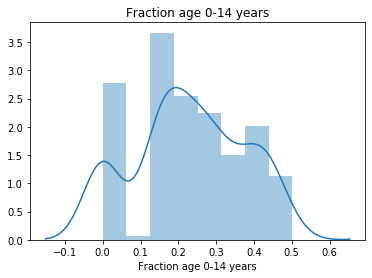

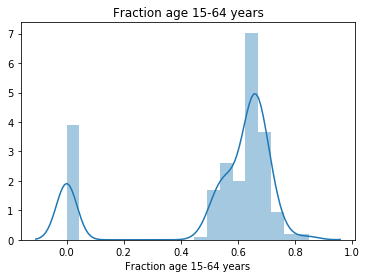

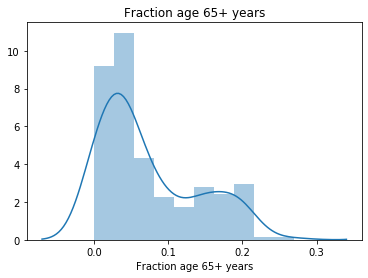

In [20]:
for i in df:
    plt.figure()
    plt.clf() #clearing the figure
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

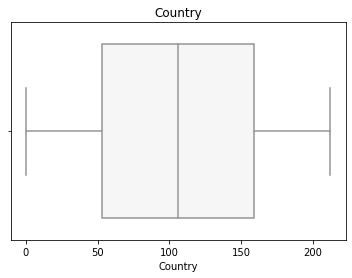

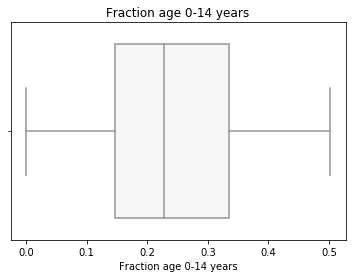

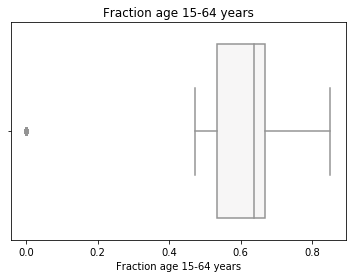

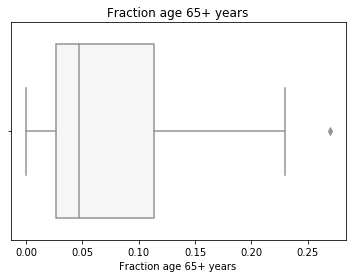

In [22]:
for i in df:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(df[i],palette="RdBu_r")
    plt.title(i)
    plt.show()

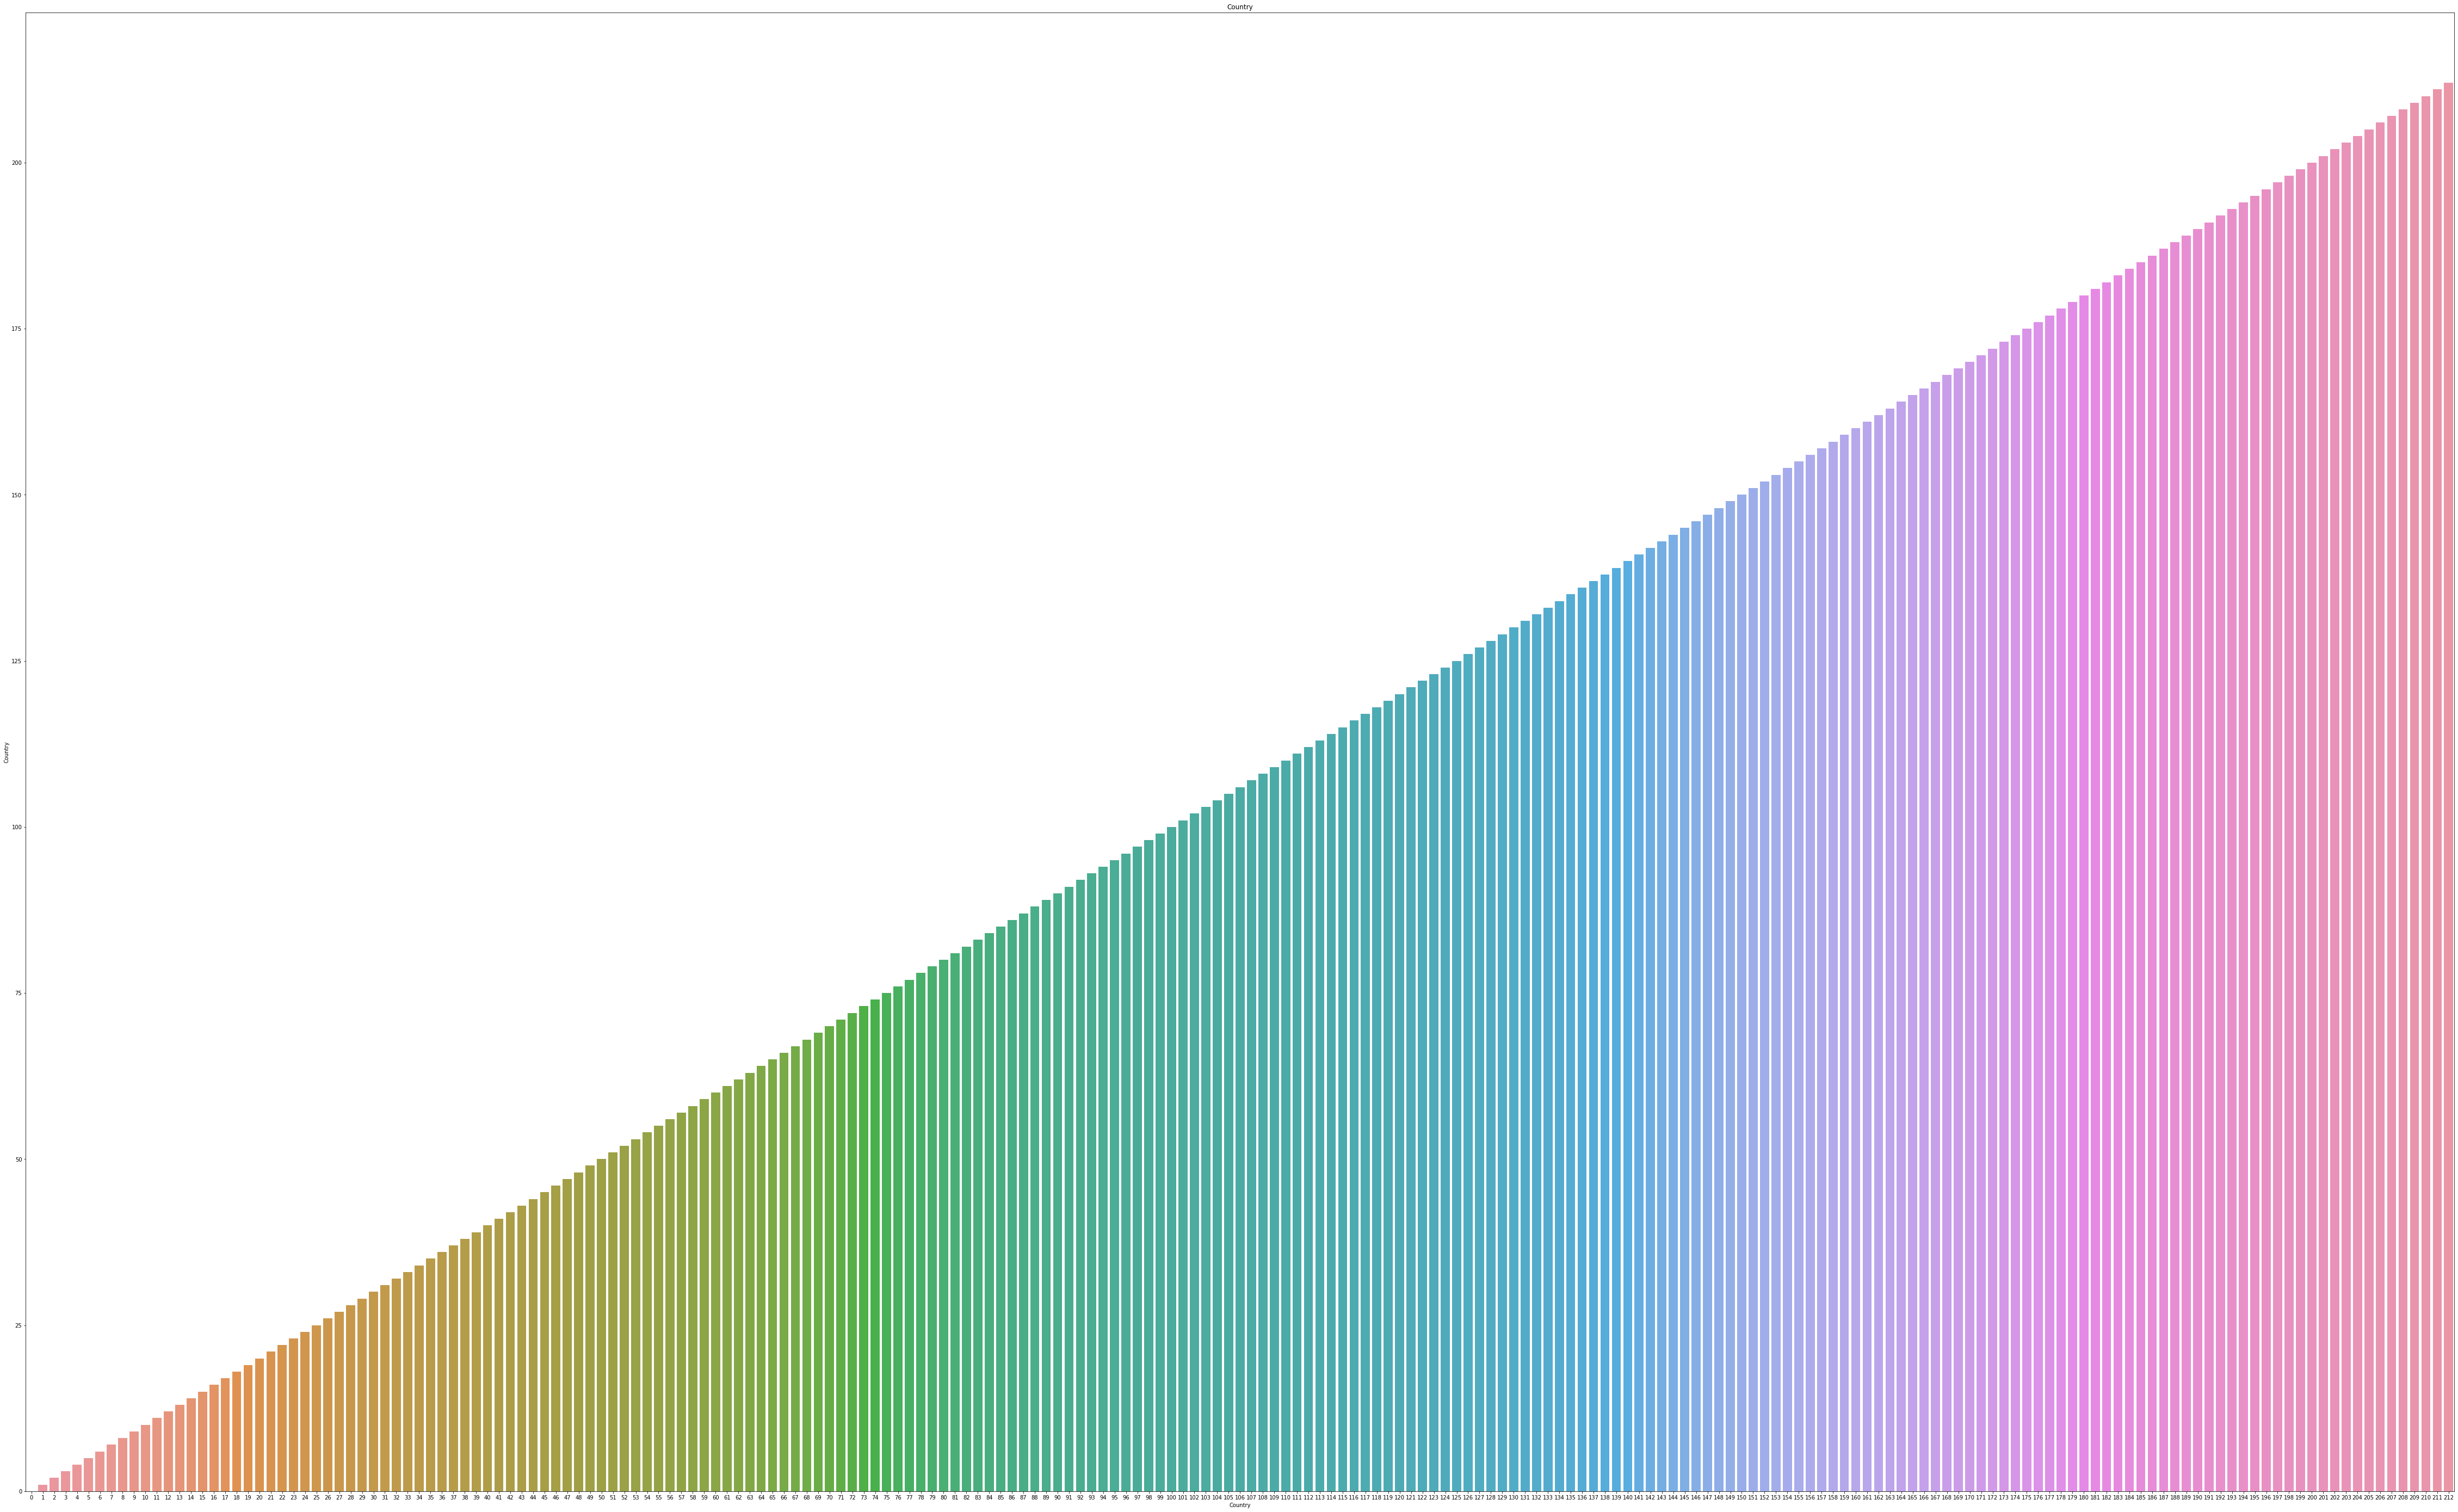

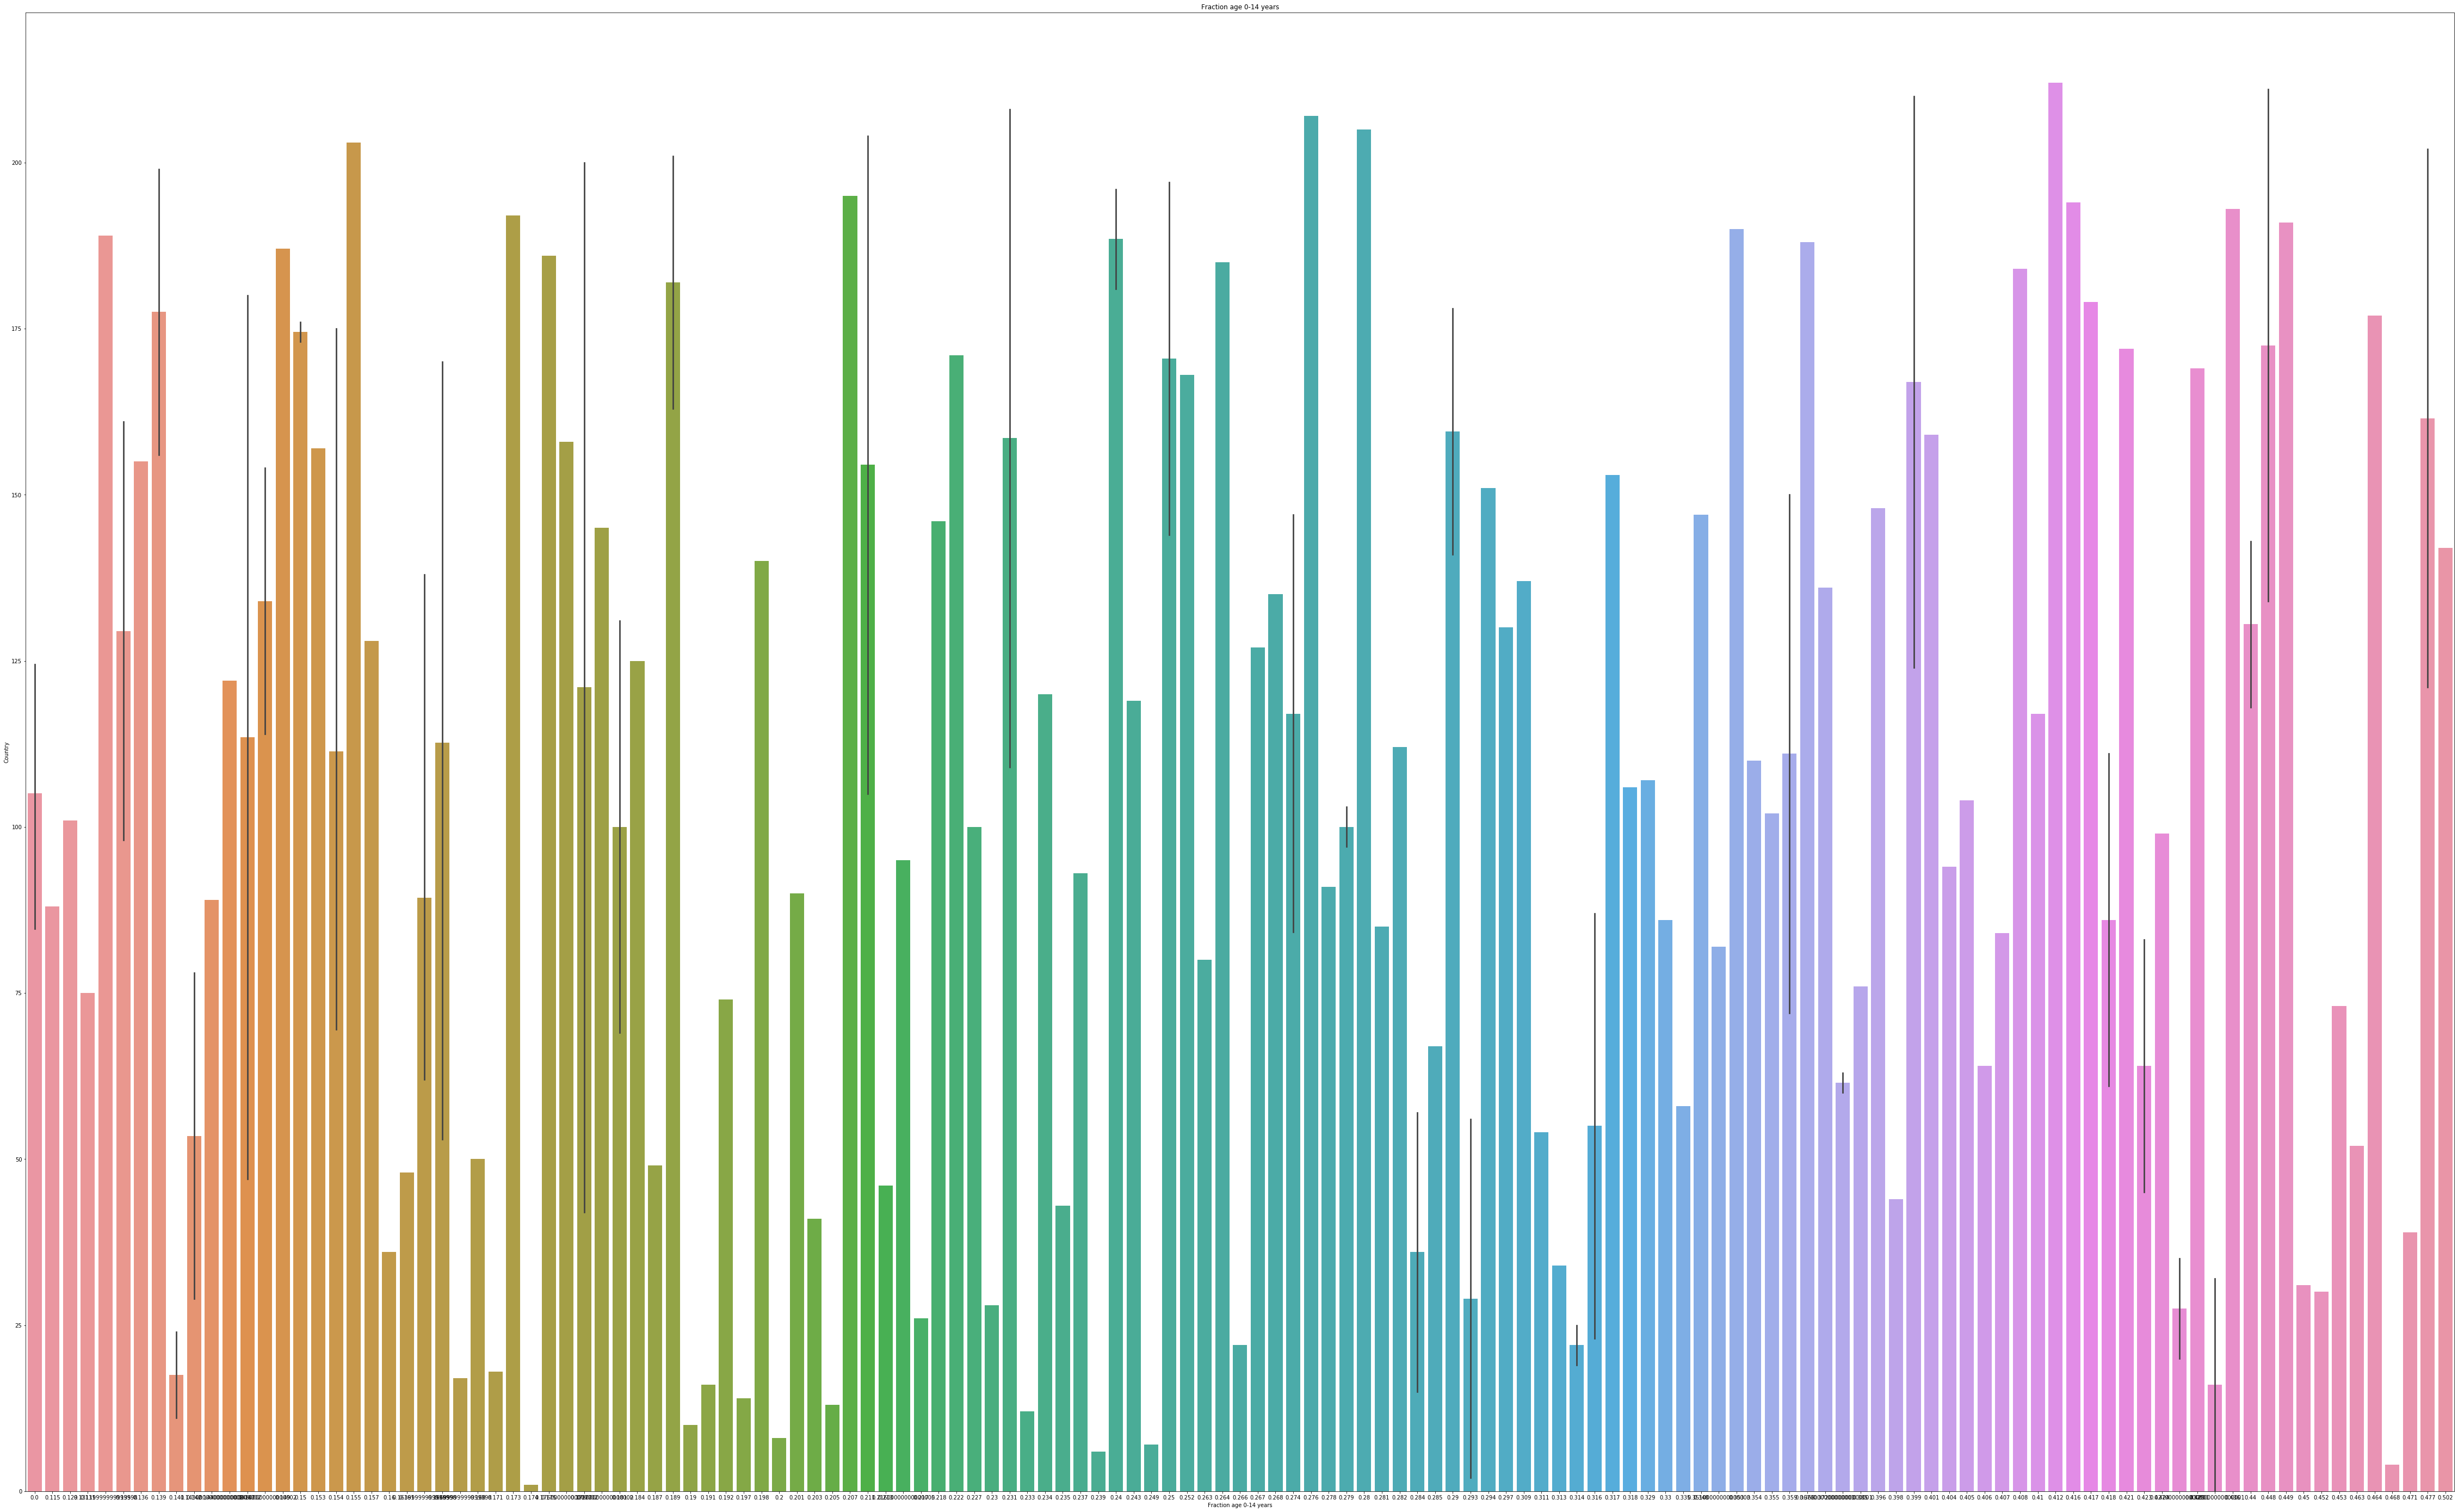

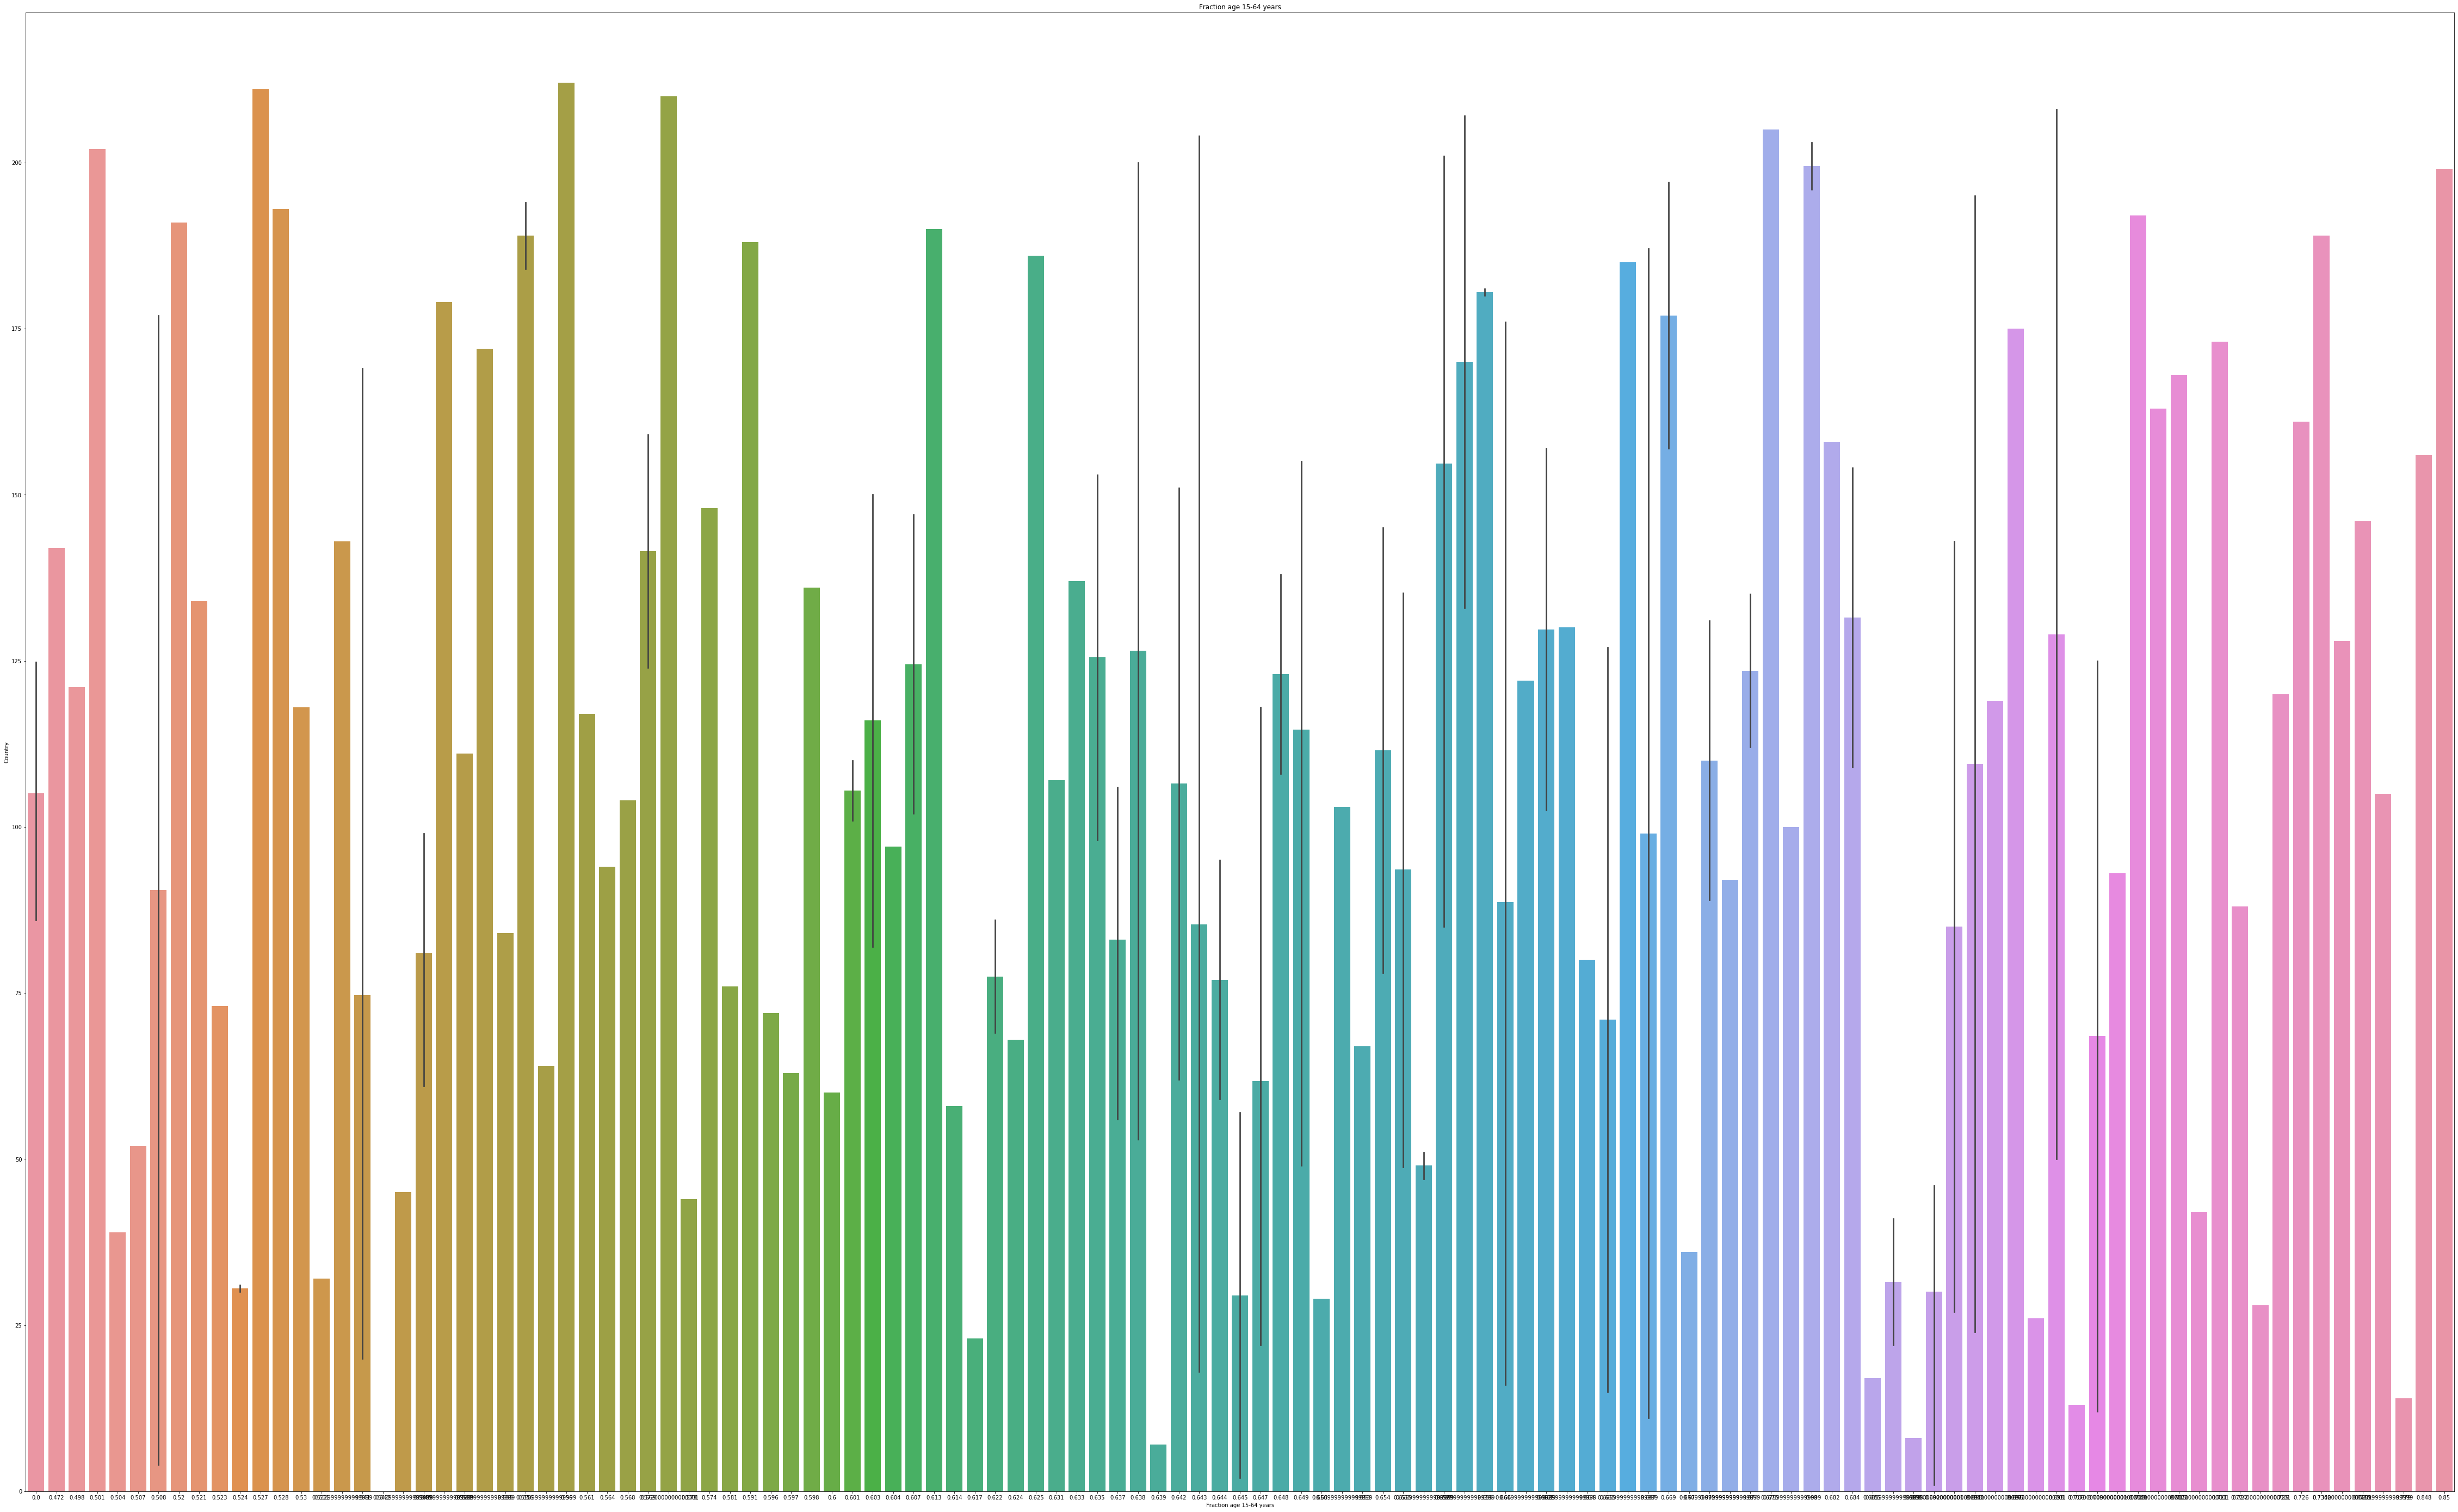

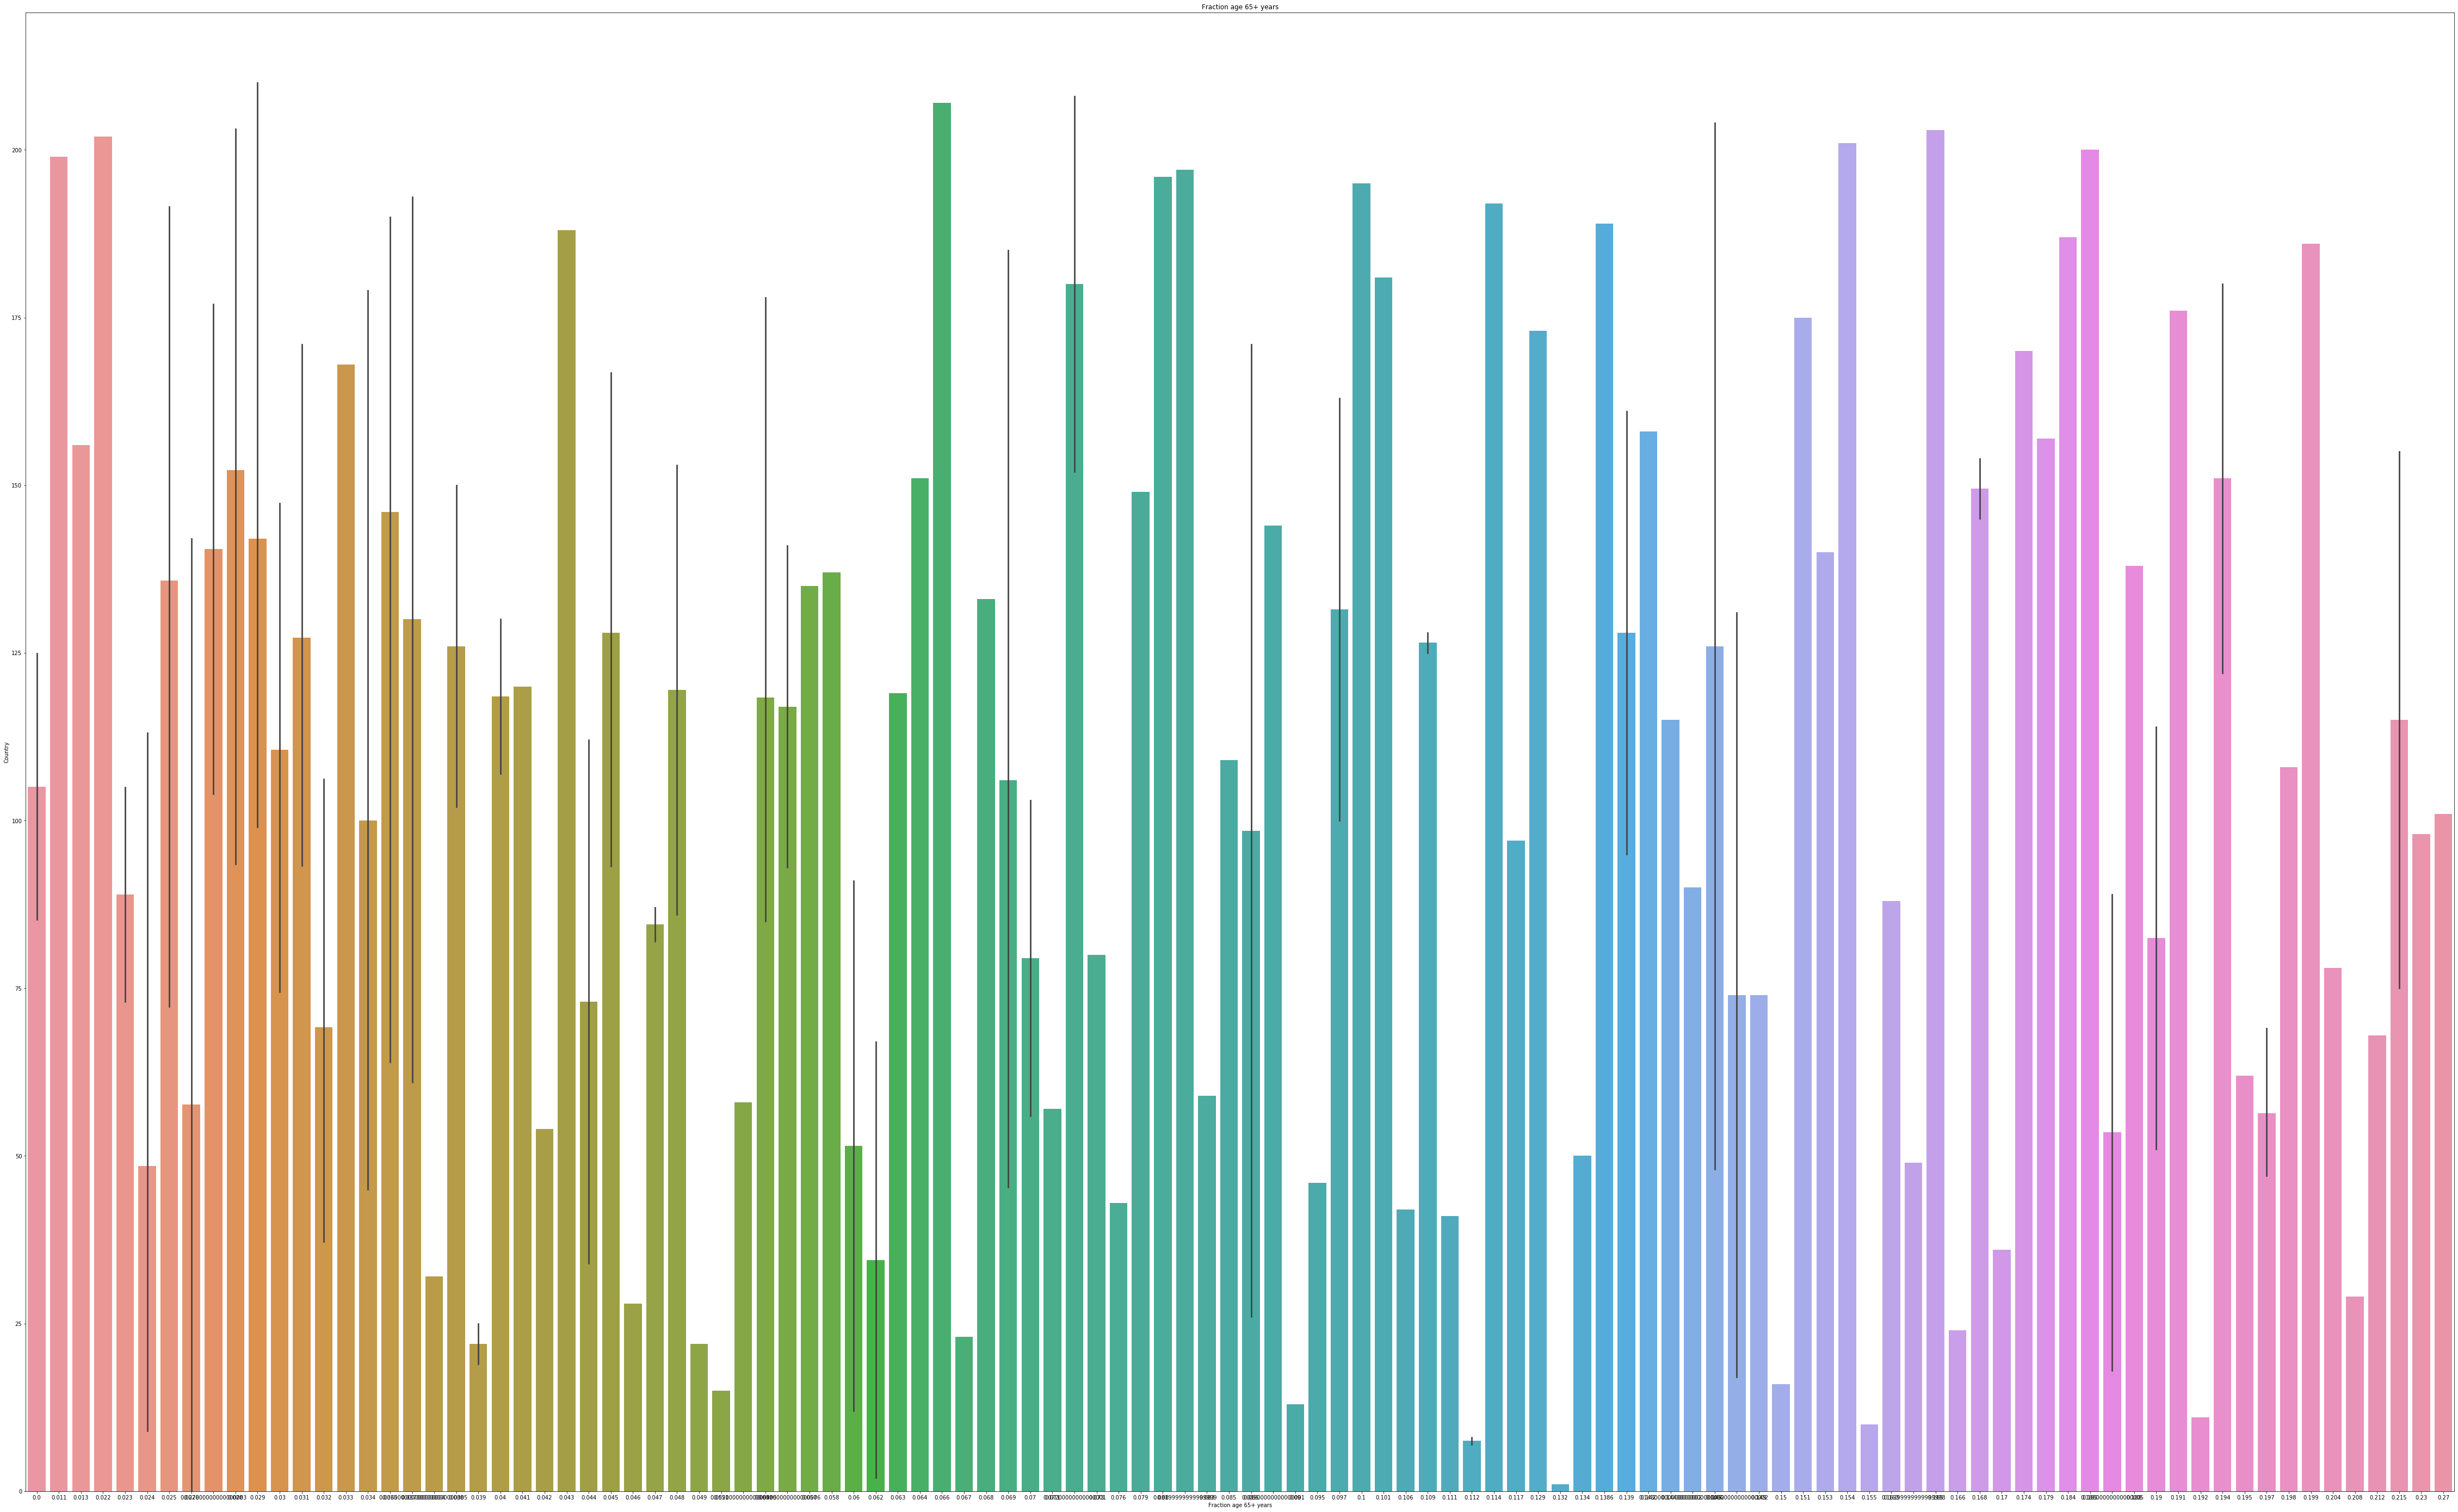

In [24]:
for i in df:
    plt.figure(figsize=(80,50))
    plt.clf() #clearing the figure
    sns.barplot(x=df[i],y=df['Country'],data=df)
    plt.title(i)
    plt.show()

In [25]:
dfcorr=df.corr()
dfcorr

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Country,1.000000,0.014318,0.009093,-0.023663
Fraction age 0-14 years,0.014318,1.000000,0.573765,-0.106074
Fraction age 15-64 years,0.009093,0.573765,1.000000,0.568106
Fraction age 65+ years,-0.023663,-0.106074,0.568106,1.000000


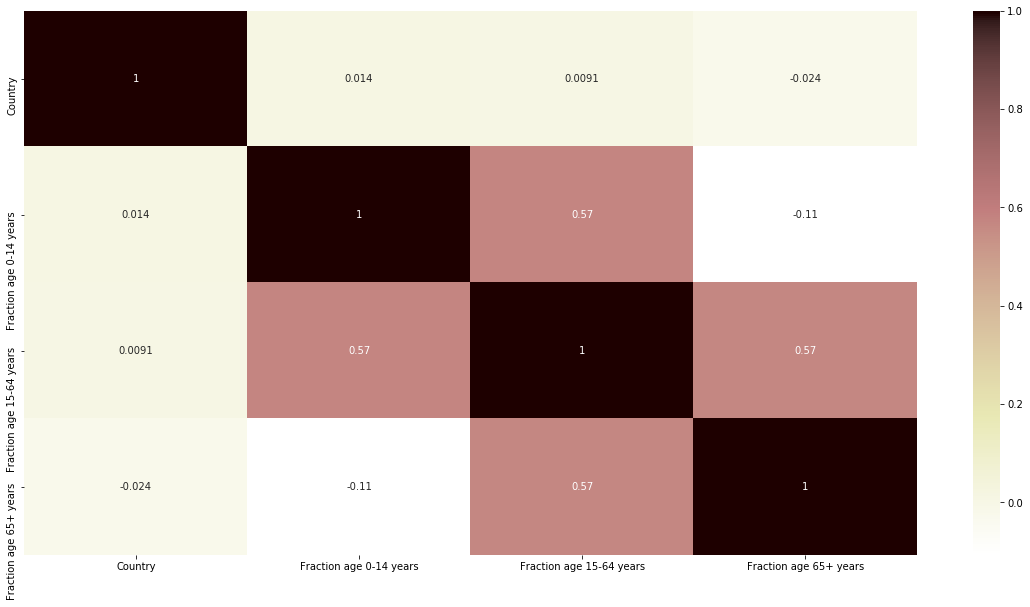

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcorr,cmap='pink_r',annot=True)

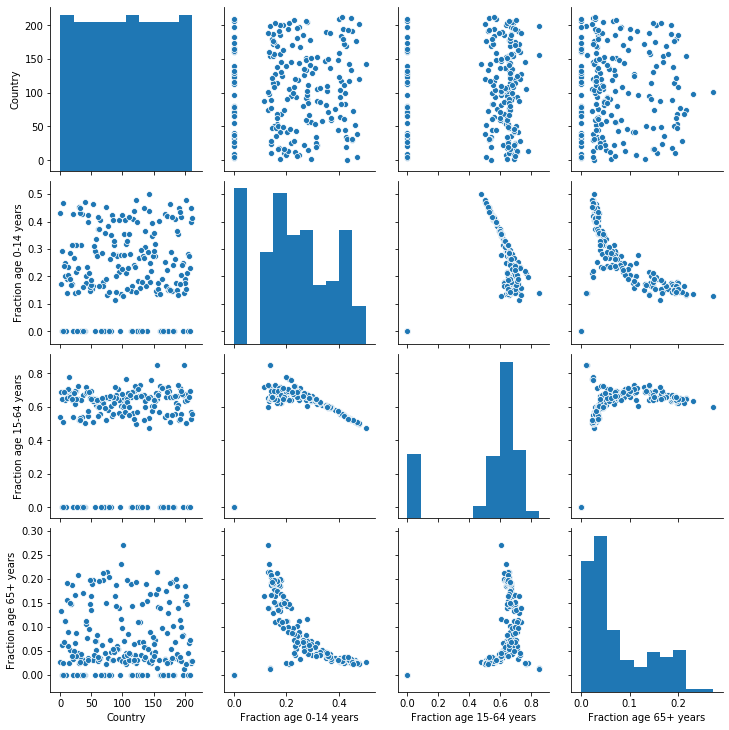

In [27]:
sns.pairplot(df)

In [29]:
x=df.iloc[:,1:]
x

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,0.189,0.657,0.154
1,0.176,0.682,0.142
2,0.147,0.659,0.194
3,0.217,0.697,0.086
4,0.177,0.638,0.185
...,...,...,...
208,0.000,0.000,0.000
209,0.000,0.000,0.000
210,0.000,0.000,0.000
211,0.354,0.601,0.045


In [30]:
y=df.iloc[:,0]
y

0      201
1      158
2      180
3       26
4      200
      ... 
208    182
209    209
210      5
211    110
212    165
Name: Country, Length: 213, dtype: int32

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.27466285,  0.52887884,  1.24063645],
       [-0.36589643,  0.6295113 ,  1.05798604],
       [-0.56941751,  0.53692944,  1.84947113],
       [-0.07815974,  0.68989077,  0.20561748],
       [-0.35887847,  0.45239817,  1.71248333],
       [-0.65363313,  0.44032228,  2.39742235],
       [-0.33080659,  0.3879934 ,  1.89513374],
       [-0.681705  ,  0.52082824,  2.16910934],
       [ 0.15343321,  0.57718242,  0.14473401],
       [ 0.06219963,  0.73819435, -0.28145027],
       [ 0.34993632,  0.54900533, -0.19012507],
       [ 0.32186445,  0.52082824, -0.00747466],
       [-0.35887847,  0.77039674,  0.51003482],
       [-0.47818392,  0.58120772,  1.48417032],
       [ 0.16746915,  0.76234614, -0.60108848],
       [-0.40098627,  0.47252466,  1.7277042 ],
       [ 0.27273867,  0.56108123, -0.05313726],
       [-0.17641129,  0.64561249,  0.58613916],
       [-0.45011205,  0.49265115,  1.75814593],
       [ 0.84119409,  0.32761392, -0.41843807],
       [-0.62556126,  1.29771081, -0.905

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2 score corresponding to random state: ', r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

r2 score corresponding to random state:  42 is:  -0.05208019147485898
r2 score corresponding to random state:  43 is:  -0.0433857031957936
r2 score corresponding to random state:  44 is:  -0.0436998142693692
r2 score corresponding to random state:  45 is:  -0.08881541902987355
r2 score corresponding to random state:  46 is:  -0.02871030132483421
r2 score corresponding to random state:  47 is:  -0.007509142382652101
r2 score corresponding to random state:  48 is:  -0.021663647603854086
r2 score corresponding to random state:  49 is:  -0.1717155249132074
r2 score corresponding to random state:  50 is:  -0.02075183734046404
r2 score corresponding to random state:  51 is:  -0.18632379169999624
r2 score corresponding to random state:  52 is:  -0.03191638672501407
r2 score corresponding to random state:  53 is:  -0.0364689852538258
r2 score corresponding to random state:  54 is:  -0.1644227867155943
r2 score corresponding to random state:  55 is:  -0.03777188295836864
r2 score corresponding 

In [35]:
print(x_train.shape,x_test.shape)

(170, 3) (43, 3)


In [42]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

models = []

models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [47]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.0




ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [38]:
LR=LinearRegression()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [39]:
models=[]
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
#models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [40]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  -0.054577738405592546
Mean_Squared_Error = 4192.99310299618
Cross_Val_Score =  -0.09126591298454038


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=97, splitter='best')
R2_score =  -1.4839161314630038
Mean_Squared_Error = 9876.031731327601
Cross_Val_Score =  -0.869285353979221


********************************* AdaBoostRegressor *********************************

 AdaBoostRegressor(base_estima

In [41]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,})
result

,Model,Accuracy_score,Cross_val_score
0,LinearRegression,-0.721649,-0.091266
1,DecisionTreeRegressor,-0.721649,-0.869285
2,AdaBoostRegressor,-0.721649,-0.069410
3,RandomForestRegressor,-0.721649,-0.322845
4,GradientBoostingRegressor,-0.721649,-0.245174
5,XGBRegressor,-0.721649,-0.721649


In [48]:
from sklearn.externals import joblib
joblib.dump(RFR,'covid 19 poulation of country.pkl')

['covid 19 poulation of country.pkl']